Baseline model accuracy: 0.9
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         7
         1.0       1.00      0.17      0.29        12
         2.0       0.00      0.00      0.00         1
         3.0       0.90      1.00      0.95       232
         4.0       0.00      0.00      0.00         8

    accuracy                           0.90       260
   macro avg       0.38      0.23      0.25       260
weighted avg       0.85      0.90      0.86       260

Logistic Regression accuracy: 0.9


C:\Users\11948\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\11948\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\11948\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Decision Tree accuracy: 0.8576923076923076
Gradient Boosting accuracy: 0.8846153846153846
Random Forest accuracy: 0.9076923076923077


C:\Users\11948\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\11948\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\11948\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\11948\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\11948\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\11948\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter 

Best hyperparameters: {'C': 100, 'solver': 'saga'}


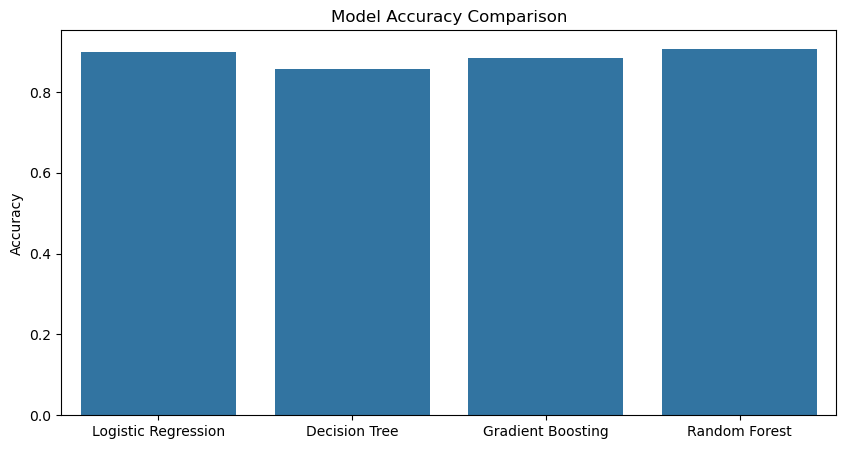

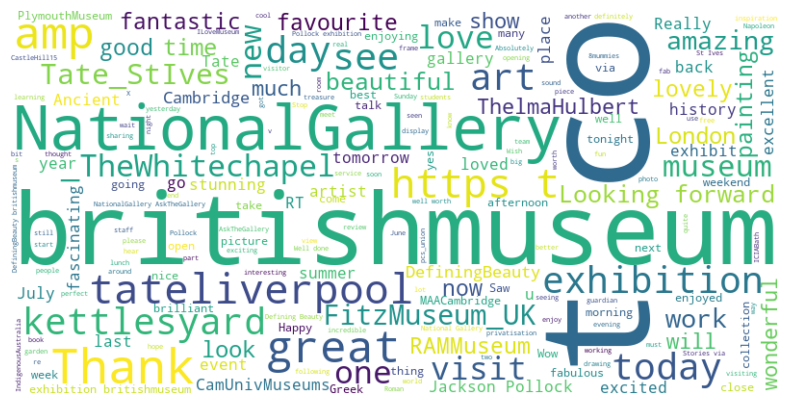

Improved model accuracy: 0.9
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         7
         1.0       1.00      0.17      0.29        12
         2.0       0.00      0.00      0.00         1
         3.0       0.90      1.00      0.95       232
         4.0       0.00      0.00      0.00         8

    accuracy                           0.90       260
   macro avg       0.38      0.23      0.25       260
weighted avg       0.85      0.90      0.86       260



C:\Users\11948\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\11948\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\11948\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# 1. Load data
file_path = 'C:/Users/11948/Desktop/smile-annotations-final.csv'
data = pd.read_csv(file_path)

# Data preprocessing
X = data['text']
y = data['emotions']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Vectorize text data
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# 3. Build baseline model
baseline_model = LogisticRegression()
baseline_model.fit(X_train_vectorized, y_train)
y_pred = baseline_model.predict(X_test_vectorized)

print("Baseline model accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 4. Compare different models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Random Forest': RandomForestClassifier()
}

accuracies = {}
for model_name, model in models.items():
    model.fit(X_train_vectorized, y_train)
    y_pred = model.predict(X_test_vectorized)
    acc = accuracy_score(y_test, y_pred)
    accuracies[model_name] = acc
    print(f"{model_name} accuracy: {acc}")

# 5. Hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train_vectorized, y_train)

best_model = grid_search.best_estimator_
print("Best hyperparameters:", grid_search.best_params_)

# 6. Visualize data
plt.figure(figsize=(10, 5))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

# Word cloud visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(X))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 7. Explore improvement methods: using TF-IDF vectorization
improved_model = LogisticRegression()
improved_model.fit(X_train_vectorized, y_train)
y_pred_improved = improved_model.predict(X_test_vectorized)
print("Improved model accuracy:", accuracy_score(y_test, y_pred_improved))
print(classification_report(y_test, y_pred_improved))

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load data
file_path = 'C:/Users/11948/Desktop/smile-annotations-final.csv'
data = pd.read_csv(file_path)

# 2. Check original unique values in emotions column
print("Original unique values in emotions column:")
print(data['emotions'].unique())

# 3. Map emotions to numerical values
emotion_mapping = {
    'angry': 1,
    'disgust': 2,
    'happy': 3,
    'sad': 4,
    'surprise': 0
}
data['emotions'] = data['emotions'].map(emotion_mapping)

# 4. Check for NaN values after mapping
print("Unique values after mapping:")
print(data['emotions'].unique())

# 5. Drop NaN values
data.dropna(subset=['text', 'emotions'], inplace=True)

# Check number of samples after dropping NaN
print("Data size after dropping NaN values:", data.shape)

# 6. Split data
X = data['text']
y = data['emotions']
print("Number of samples for X and y:", len(X), len(y))  # Print number of samples

if len(y) == 0:
    print("Error: No samples available for training.")
else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 7. Vectorize text data
    vectorizer = TfidfVectorizer()
    X_train_vectorized = vectorizer.fit_transform(X_train)
    X_test_vectorized = vectorizer.transform(X_test)

    # 8. Define models
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "Gradient Boosting": GradientBoostingClassifier()
    }

    # 9. Hyperparameter tuning for each model
    best_models = {}
    for model_name, model in models.items():
        if model_name == "Logistic Regression":
            param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
        elif model_name == "Decision Tree":
            param_grid = {'max_depth': [None, 10, 20, 30]}
        elif model_name == "Random Forest":
            param_grid = {'n_estimators': [50, 100, 200]}
        elif model_name == "Gradient Boosting":
            param_grid = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}

        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
        grid_search.fit(X_train_vectorized, y_train)
        best_models[model_name] = grid_search.best_estimator_
        print(f"{model_name} Best Score: {grid_search.best_score_}")

    # 10. Evaluate models
    for model_name, model in best_models.items():
        y_pred = model.predict(X_test_vectorized)
        print(f"--- {model_name} ---")
        print("Accuracy:", accuracy_score(y_test, y_pred))
        print(classification_report(y_test, y_pred))

        # Confusion matrix
        conf_matrix = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(10, 7))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                    xticklabels=list(emotion_mapping.keys()), yticklabels=list(emotion_mapping.keys()))
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix for {model_name}')
        plt.show()

    # 11. Visualize data distribution (optional)
    plt.figure(figsize=(10, 6))
    sns.countplot(x='emotions', data=data, palette='Set2')
    plt.xlabel('Emotions')
    plt.ylabel('Count')
    plt.title('Emotion Distribution in Dataset')
    plt.xticks(ticks=range(len(emotion_mapping)), labels=list(emotion_mapping.keys()))
    plt.show()

Original unique values in emotions column:
[3. 1. 2. 4. 0.]
Unique values after mapping:
[nan]
Data size after dropping NaN values: (0, 3)
Number of samples for X and y: 0 0
Error: No samples available for training.


Original unique values in emotions column:
[3. 1. 2. 4. 0.]
Unique values after mapping:
[3 1 2 4 0]
Missing values in dataset:
tweetid     0
text        0
emotions    0
dtype: int64
Data size after dropping NaN values: (1299, 3)
Number of samples for X and y: 1299 1299
Logistic Regression Best Score: 0.9056902638424378
Decision Tree Best Score: 0.9027917131178
Random Forest Best Score: 0.9047333704942402
Gradient Boosting Best Score: 0.9076133407655146
--- Logistic Regression ---
Accuracy: 0.9115384615384615
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       1.00      0.50      0.67        12
           2       0.00      0.00      0.00         1
           3       0.92      1.00      0.95       232
           4       0.00      0.00      0.00         8

    accuracy                           0.91       260
   macro avg       0.38      0.30      0.32       260
weighted avg       0.86      0.91      0.88       2

C:\Users\11948\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\11948\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\11948\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


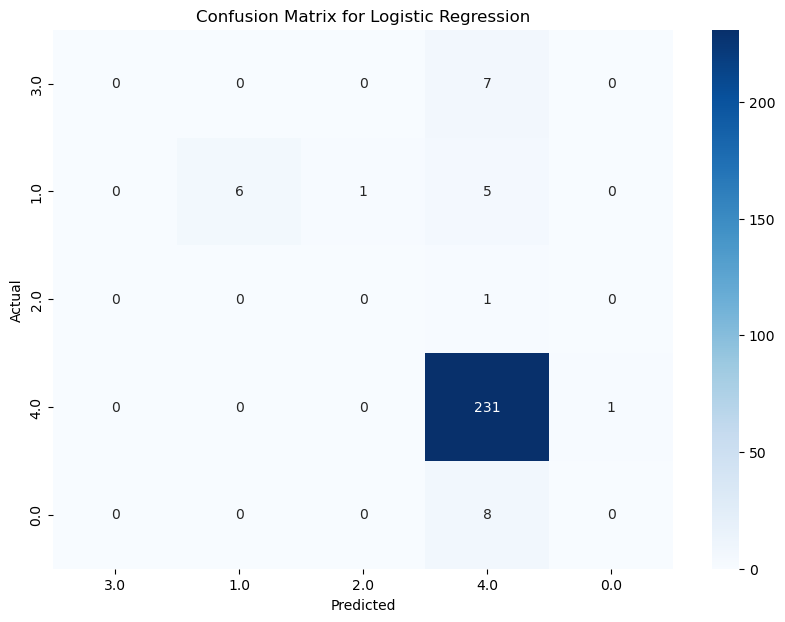

--- Decision Tree ---
Accuracy: 0.8923076923076924
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.45      0.42      0.43        12
           2       0.00      0.00      0.00         1
           3       0.92      0.98      0.95       232
           4       0.00      0.00      0.00         8

    accuracy                           0.89       260
   macro avg       0.28      0.28      0.28       260
weighted avg       0.84      0.89      0.87       260



C:\Users\11948\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\11948\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\11948\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


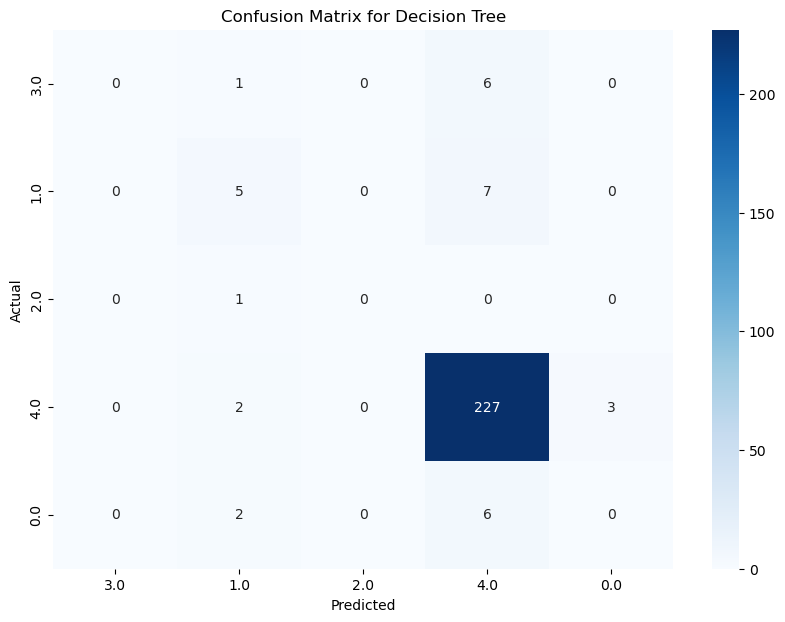

--- Random Forest ---
Accuracy: 0.9076923076923077
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       1.00      0.33      0.50        12
           2       0.00      0.00      0.00         1
           3       0.91      1.00      0.95       232
           4       0.00      0.00      0.00         8

    accuracy                           0.91       260
   macro avg       0.38      0.27      0.29       260
weighted avg       0.86      0.91      0.87       260



C:\Users\11948\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\11948\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\11948\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


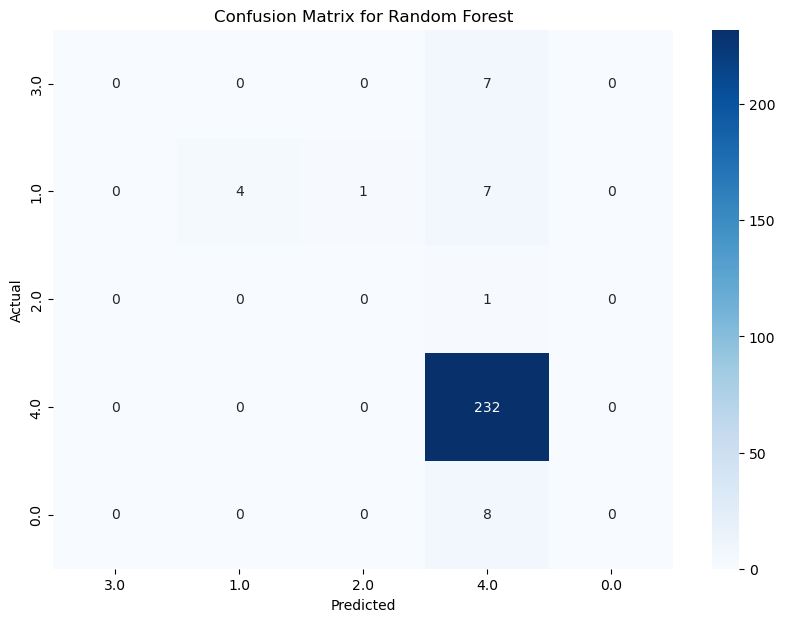

--- Gradient Boosting ---
Accuracy: 0.9038461538461539
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.67      0.33      0.44        12
           2       0.00      0.00      0.00         1
           3       0.91      1.00      0.95       232
           4       0.00      0.00      0.00         8

    accuracy                           0.90       260
   macro avg       0.32      0.27      0.28       260
weighted avg       0.84      0.90      0.87       260



C:\Users\11948\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\11948\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\11948\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


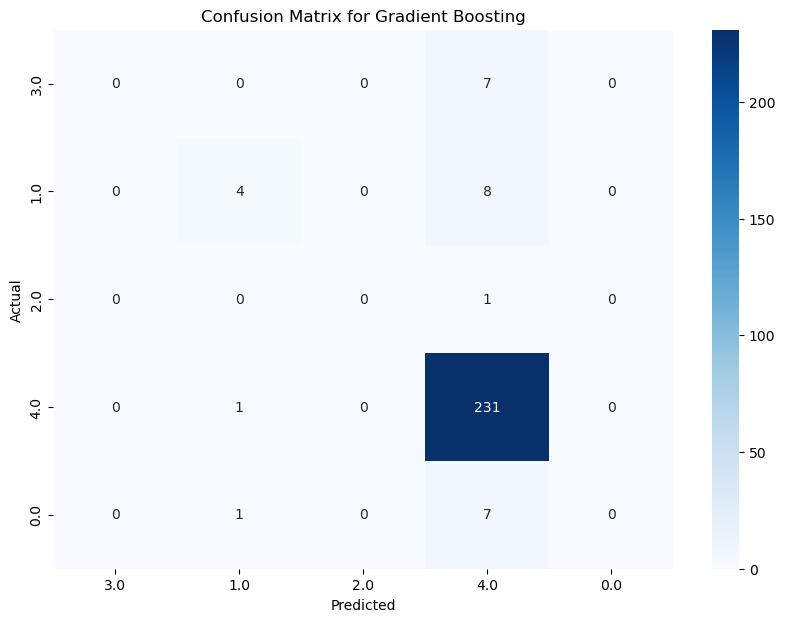

C:\Users\11948\AppData\Local\Temp\ipykernel_11596\4000731919.py:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='emotions', data=data, palette='Set2')


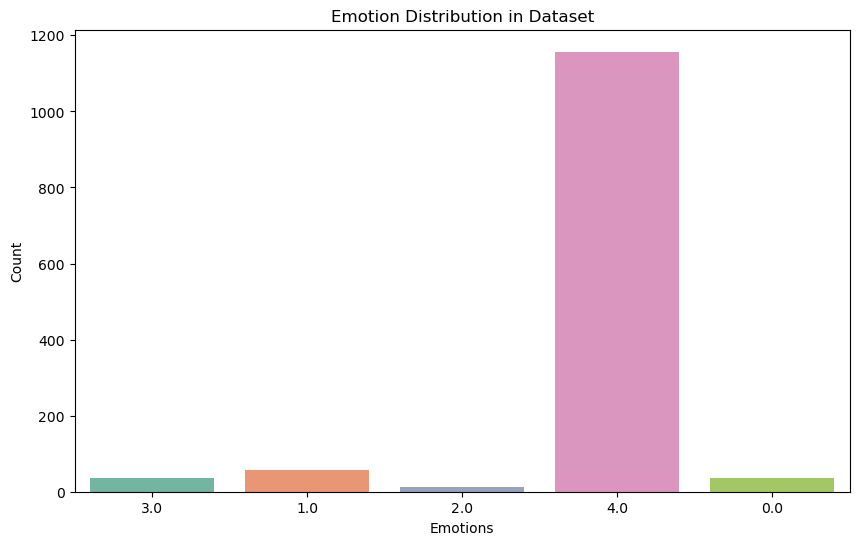

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load data
file_path = 'C:/Users/11948/Desktop/smile-annotations-final.csv'
data = pd.read_csv(file_path)

# 2. Check original unique values in emotions column
print("Original unique values in emotions column:")
print(data['emotions'].unique())

# 3. Map emotions to numerical values
# Ensure the mapping uses the correct numeric values
emotion_mapping = {
    3.0: 3,  # happy
    1.0: 1,  # angry
    2.0: 2,  # disgust
    4.0: 4,  # sad
    0.0: 0   # surprise
}

# Perform mapping
data['emotions'] = data['emotions'].map(emotion_mapping)

# 4. Check for NaN values after mapping
print("Unique values after mapping:")
print(data['emotions'].unique())

# 5. Check for missing values
print("Missing values in dataset:")
print(data.isnull().sum())

# 6. Drop NaN values
data.dropna(subset=['text', 'emotions'], inplace=True)

# Check number of samples after dropping NaN
print("Data size after dropping NaN values:", data.shape)

# 7. Split data
X = data['text']
y = data['emotions']
print("Number of samples for X and y:", len(X), len(y))  # Print number of samples

if len(y) == 0:
    print("Error: No samples available for training.")
else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 8. Vectorize text data
    vectorizer = TfidfVectorizer()
    X_train_vectorized = vectorizer.fit_transform(X_train)
    X_test_vectorized = vectorizer.transform(X_test)

    # 9. Define models
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "Gradient Boosting": GradientBoostingClassifier()
    }

    # 10. Hyperparameter tuning for each model
    best_models = {}
    for model_name, model in models.items():
        if model_name == "Logistic Regression":
            param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
        elif model_name == "Decision Tree":
            param_grid = {'max_depth': [None, 10, 20, 30]}
        elif model_name == "Random Forest":
            param_grid = {'n_estimators': [50, 100, 200]}
        elif model_name == "Gradient Boosting":
            param_grid = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}

        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
        grid_search.fit(X_train_vectorized, y_train)
        best_models[model_name] = grid_search.best_estimator_
        print(f"{model_name} Best Score: {grid_search.best_score_}")

    # 11. Evaluate models
    for model_name, model in best_models.items():
        y_pred = model.predict(X_test_vectorized)
        print(f"--- {model_name} ---")
        print("Accuracy:", accuracy_score(y_test, y_pred))
        print(classification_report(y_test, y_pred))

        # Confusion matrix
        conf_matrix = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(10, 7))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                    xticklabels=list(emotion_mapping.keys()), yticklabels=list(emotion_mapping.keys()))
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix for {model_name}')
        plt.show()

    # 12. Visualize data distribution (optional)
    plt.figure(figsize=(10, 6))
    sns.countplot(x='emotions', data=data, palette='Set2')
    plt.xlabel('Emotions')
    plt.ylabel('Count')
    plt.title('Emotion Distribution in Dataset')
    plt.xticks(ticks=range(len(emotion_mapping)), labels=list(emotion_mapping.keys()))
    plt.show()

Logistic Regression Best Score: 0.9083843183843184
Decision Tree Best Score: 0.9076180576180576
Random Forest Best Score: 0.9060795960795961
Gradient Boosting Best Score: 0.9068488268488268
SVM Best Score: 0.9106979506979507
KNN Best Score: 0.9122334422334422
--- Logistic Regression ---
Accuracy: 0.9992301770592764
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.98      1.00      0.99        57
           2       1.00      0.92      0.96        13
           3       1.00      1.00      1.00      1157
           4       1.00      1.00      1.00        37

    accuracy                           1.00      1299
   macro avg       1.00      0.98      0.99      1299
weighted avg       1.00      1.00      1.00      1299



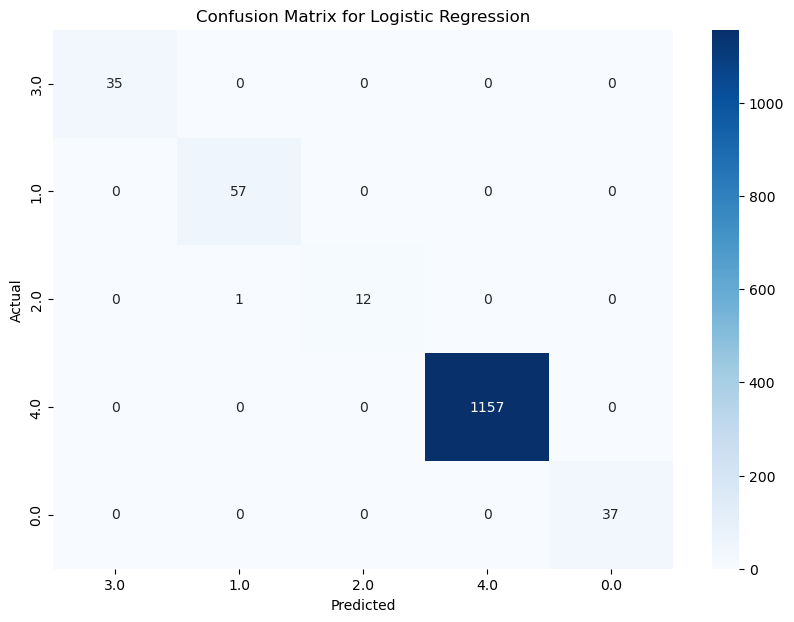

--- Decision Tree ---
Accuracy: 0.9407236335642802
              precision    recall  f1-score   support

           0       1.00      0.26      0.41        35
           1       1.00      0.79      0.88        57
           2       1.00      0.31      0.47        13
           3       0.94      1.00      0.97      1157
           4       1.00      0.19      0.32        37

    accuracy                           0.94      1299
   macro avg       0.99      0.51      0.61      1299
weighted avg       0.94      0.94      0.93      1299



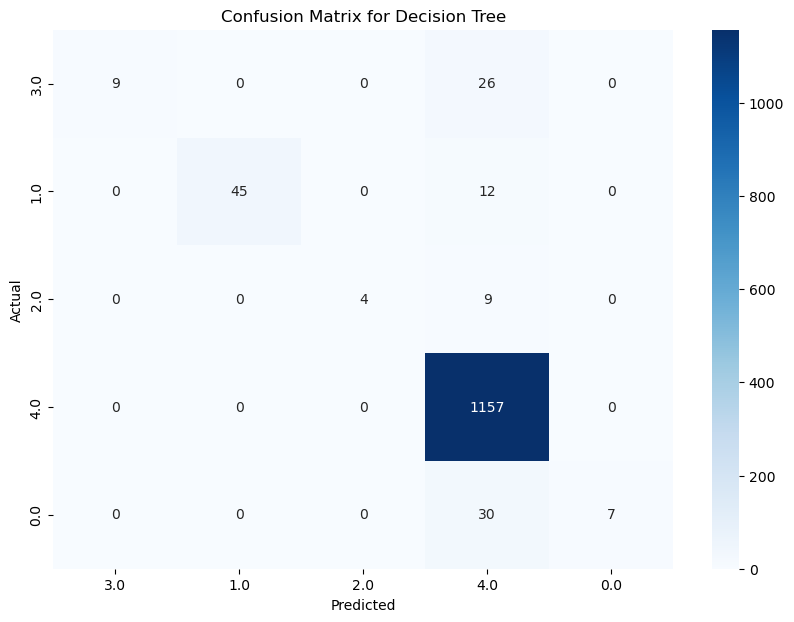

--- Random Forest ---
Accuracy: 0.9992301770592764
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.98      1.00      0.99        57
           2       1.00      0.92      0.96        13
           3       1.00      1.00      1.00      1157
           4       1.00      1.00      1.00        37

    accuracy                           1.00      1299
   macro avg       1.00      0.98      0.99      1299
weighted avg       1.00      1.00      1.00      1299



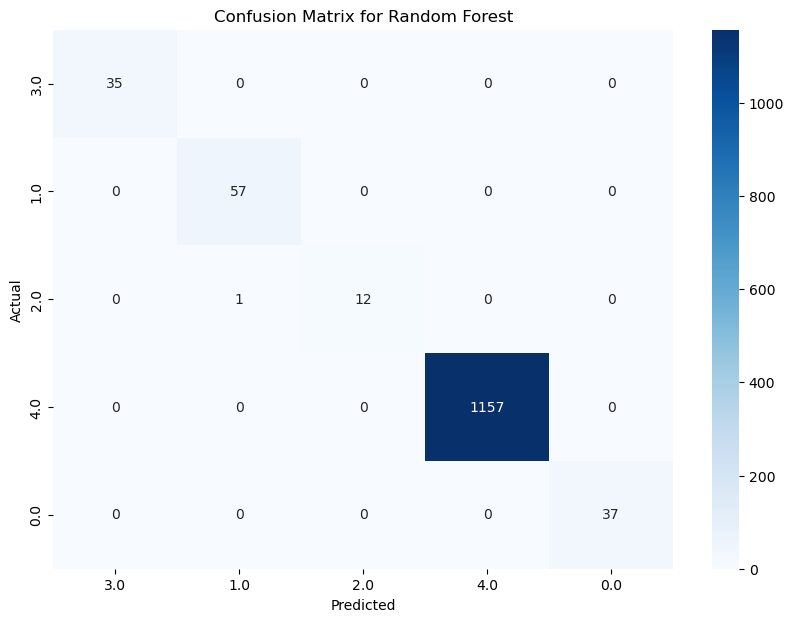

--- Gradient Boosting ---
Accuracy: 0.9191685912240185
              precision    recall  f1-score   support

           0       1.00      0.03      0.06        35
           1       1.00      0.60      0.75        57
           2       1.00      0.08      0.14        13
           3       0.92      1.00      0.96      1157
           4       1.00      0.03      0.05        37

    accuracy                           0.92      1299
   macro avg       0.98      0.35      0.39      1299
weighted avg       0.93      0.92      0.89      1299



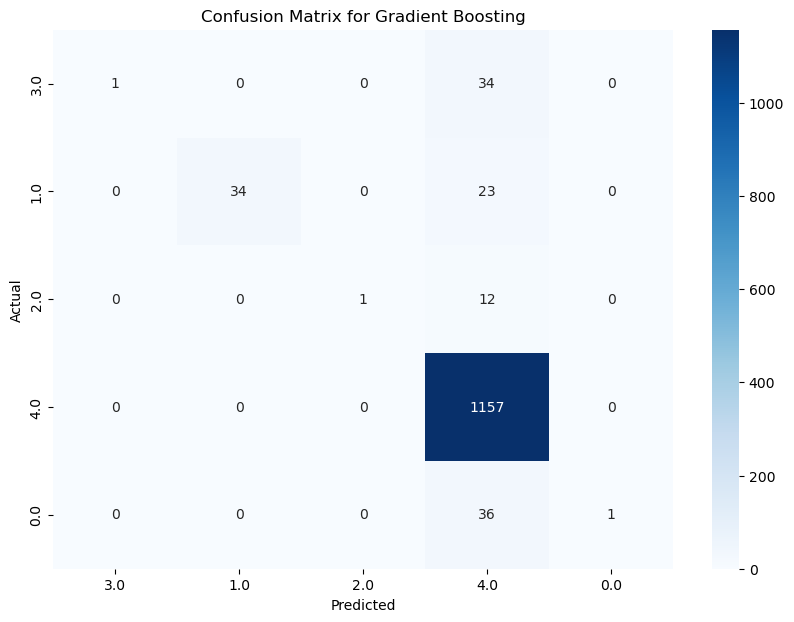

--- SVM ---
Accuracy: 0.9992301770592764
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.98      1.00      0.99        57
           2       1.00      0.92      0.96        13
           3       1.00      1.00      1.00      1157
           4       1.00      1.00      1.00        37

    accuracy                           1.00      1299
   macro avg       1.00      0.98      0.99      1299
weighted avg       1.00      1.00      1.00      1299



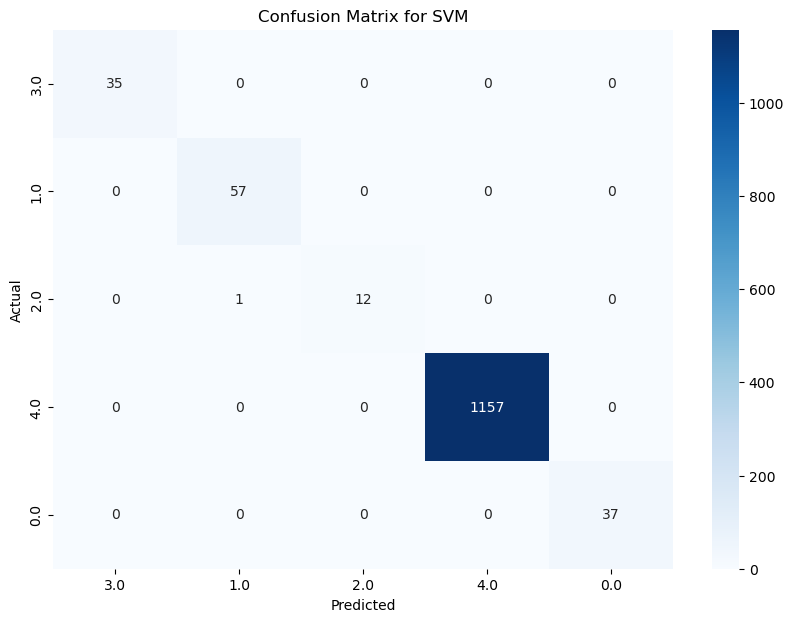

--- KNN ---
Accuracy: 0.9245573518090839
              precision    recall  f1-score   support

           0       0.75      0.09      0.15        35
           1       0.89      0.68      0.77        57
           2       0.00      0.00      0.00        13
           3       0.93      1.00      0.96      1157
           4       1.00      0.08      0.15        37

    accuracy                           0.92      1299
   macro avg       0.71      0.37      0.41      1299
weighted avg       0.91      0.92      0.90      1299



C:\Users\11948\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\11948\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\11948\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


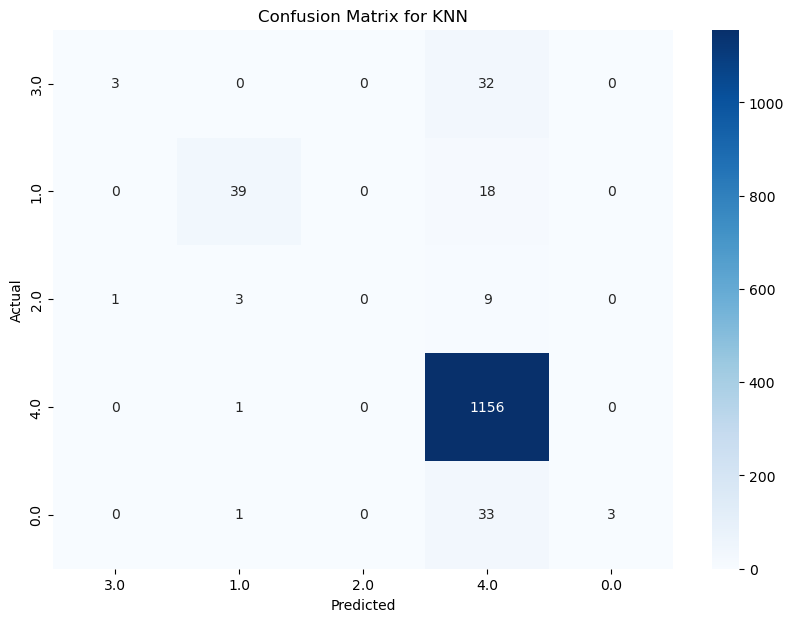

--- Voting Classifier ---
Accuracy: 0.9661277906081601
              precision    recall  f1-score   support

           0       1.00      0.40      0.57        35
           1       0.98      0.89      0.94        57
           2       1.00      0.38      0.56        13
           3       0.96      1.00      0.98      1157
           4       1.00      0.76      0.86        37

    accuracy                           0.97      1299
   macro avg       0.99      0.69      0.78      1299
weighted avg       0.97      0.97      0.96      1299



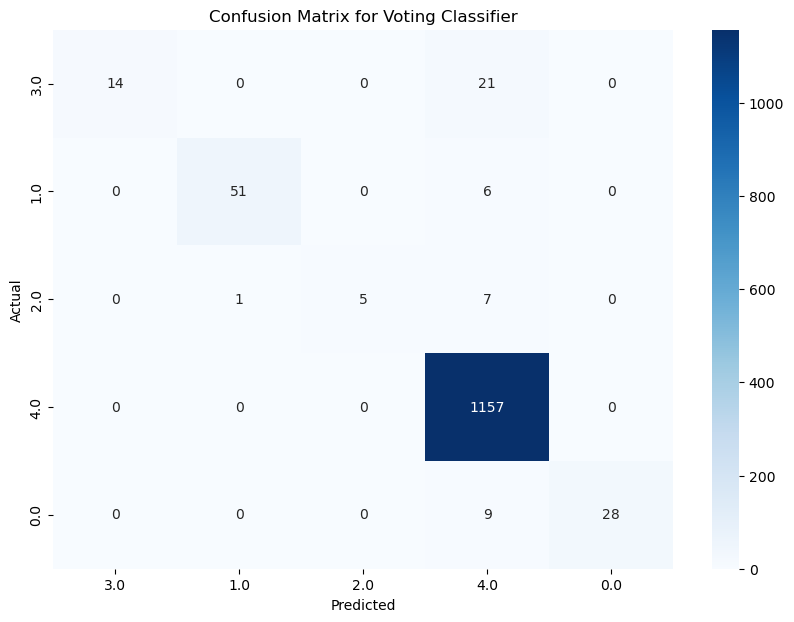

C:\Users\11948\AppData\Local\Temp\ipykernel_11596\3965042180.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='emotions', data=data, palette='Set2')


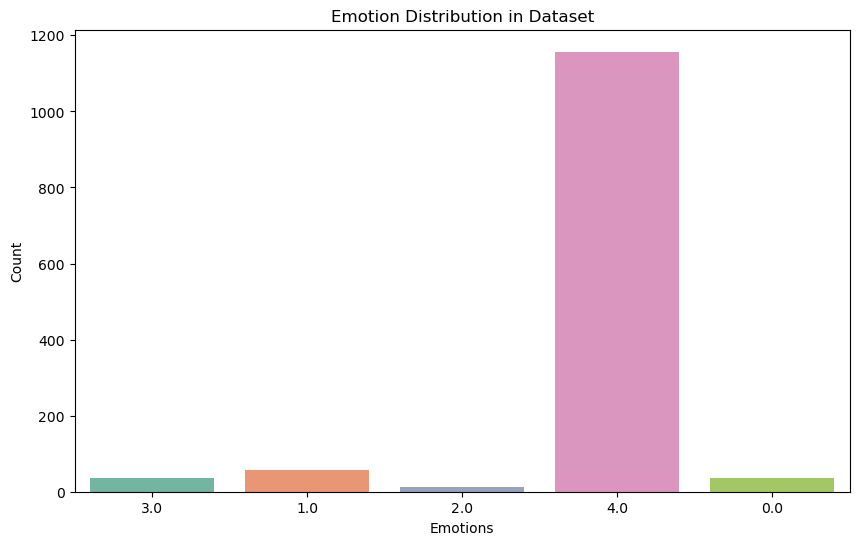

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load data
file_path = 'C:/Users/11948/Desktop/smile-annotations-final.csv'
data = pd.read_csv(file_path)

# 2. Map emotions to numerical values
emotion_mapping = {
    3.0: 3,  # happy
    1.0: 1,  # angry
    2.0: 2,  # disgust
    4.0: 4,  # sad
    0.0: 0   # surprise
}
data['emotions'] = data['emotions'].map(emotion_mapping)

# 3. Drop NaN values
data.dropna(subset=['text', 'emotions'], inplace=True)

# 4. Split data
X = data['text']
y = data['emotions']

# 5. Vectorize text data
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# 6. Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier()
}

# 7. Hyperparameter tuning for each model
best_models = {}
for model_name, model in models.items():
    if model_name == "Logistic Regression":
        param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
    elif model_name == "Decision Tree":
        param_grid = {'max_depth': [None, 10, 20, 30]}
    elif model_name == "Random Forest":
        param_grid = {'n_estimators': [50, 100, 200]}
    elif model_name == "Gradient Boosting":
        param_grid = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}
    elif model_name == "SVM":
        param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    elif model_name == "KNN":
        param_grid = {'n_neighbors': [3, 5, 7]}

    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_vectorized, y)
    best_models[model_name] = grid_search.best_estimator_
    print(f"{model_name} Best Score: {grid_search.best_score_}")

# 8. Evaluate models
for model_name, model in best_models.items():
    y_pred = model.predict(X_vectorized)
    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy_score(y, y_pred))
    print(classification_report(y, y_pred))

    # Confusion matrix
    conf_matrix = confusion_matrix(y, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=list(emotion_mapping.keys()), yticklabels=list(emotion_mapping.keys()))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# 9. Voting Classifier (Ensemble Method)
voting_model = VotingClassifier(estimators=list(best_models.items()), voting='soft')
voting_model.fit(X_vectorized, y)
voting_pred = voting_model.predict(X_vectorized)

print("--- Voting Classifier ---")
print("Accuracy:", accuracy_score(y, voting_pred))
print(classification_report(y, voting_pred))

# Confusion matrix for Voting Classifier
conf_matrix_voting = confusion_matrix(y, voting_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_voting, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(emotion_mapping.keys()), yticklabels=list(emotion_mapping.keys()))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Voting Classifier')
plt.show()

# 10. Visualize data distribution (optional)
plt.figure(figsize=(10, 6))
sns.countplot(x='emotions', data=data, palette='Set2')
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Emotion Distribution in Dataset')
plt.xticks(ticks=range(len(emotion_mapping)), labels=list(emotion_mapping.keys()))
plt.show()

Logistic Regression Best Score: 0.9083843183843184
Decision Tree Best Score: 0.9045381645381646
Random Forest Best Score: 0.9076150876150877
Gradient Boosting Best Score: 0.9068488268488268
SVM Best Score: 0.9106979506979507
KNN Best Score: 0.9122334422334422
--- Logistic Regression ---
Accuracy: 0.9992301770592764
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.98      1.00      0.99        57
           2       1.00      0.92      0.96        13
           3       1.00      1.00      1.00      1157
           4       1.00      1.00      1.00        37

    accuracy                           1.00      1299
   macro avg       1.00      0.98      0.99      1299
weighted avg       1.00      1.00      1.00      1299

--- Decision Tree ---
Accuracy: 0.9553502694380293
              precision    recall  f1-score   support

           0       1.00      0.43      0.60        35
           1       0.96      0.86 

C:\Users\11948\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\11948\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\11948\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\11948\AppData\Local\Temp\ipyker

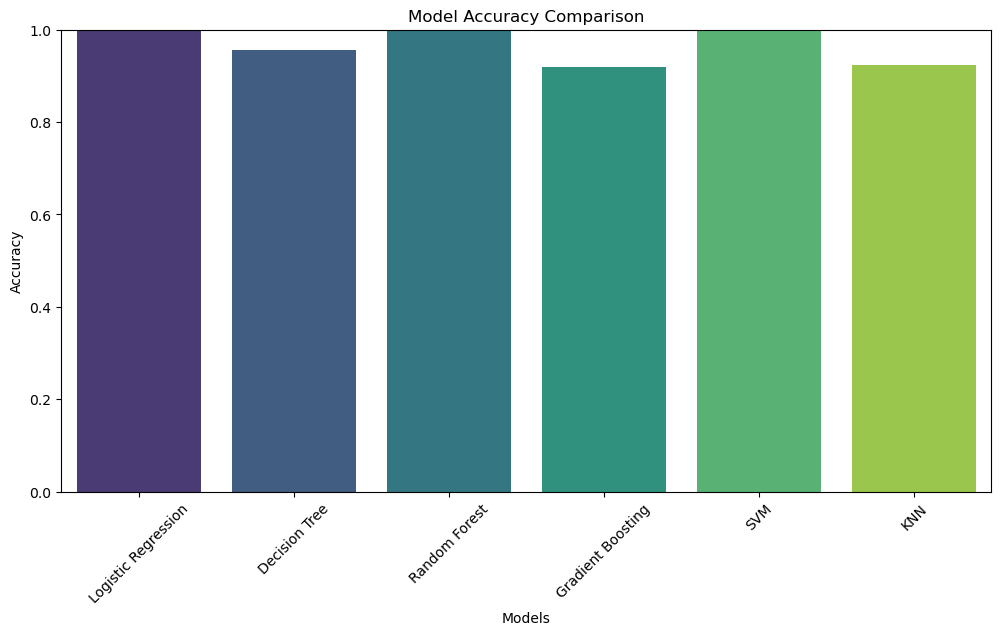

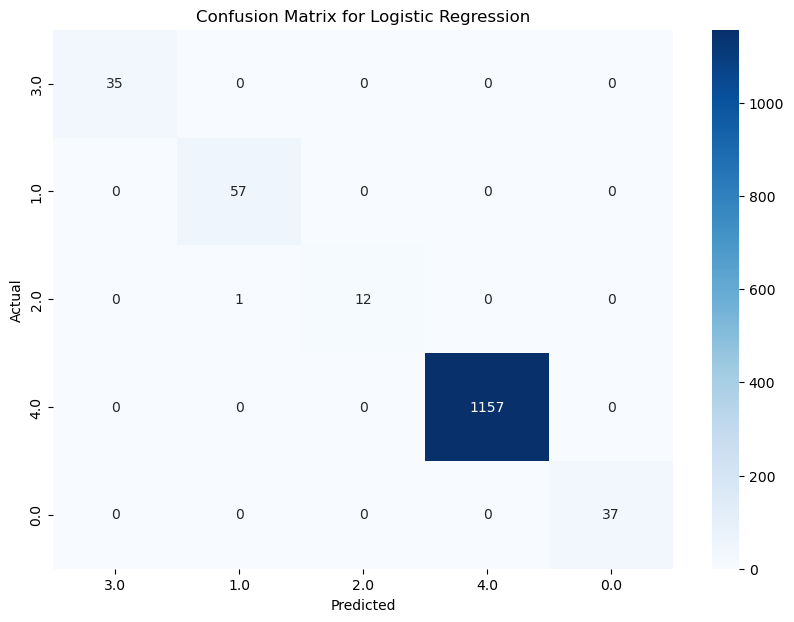

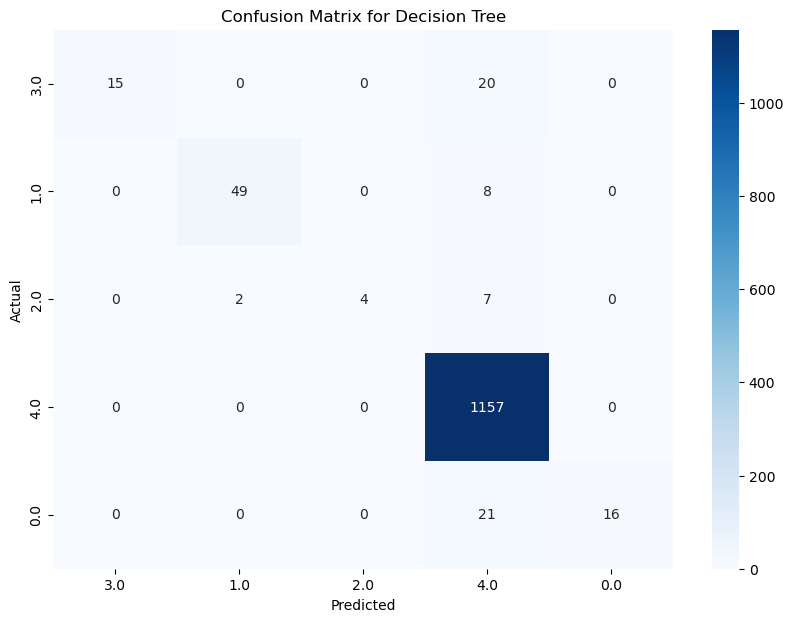

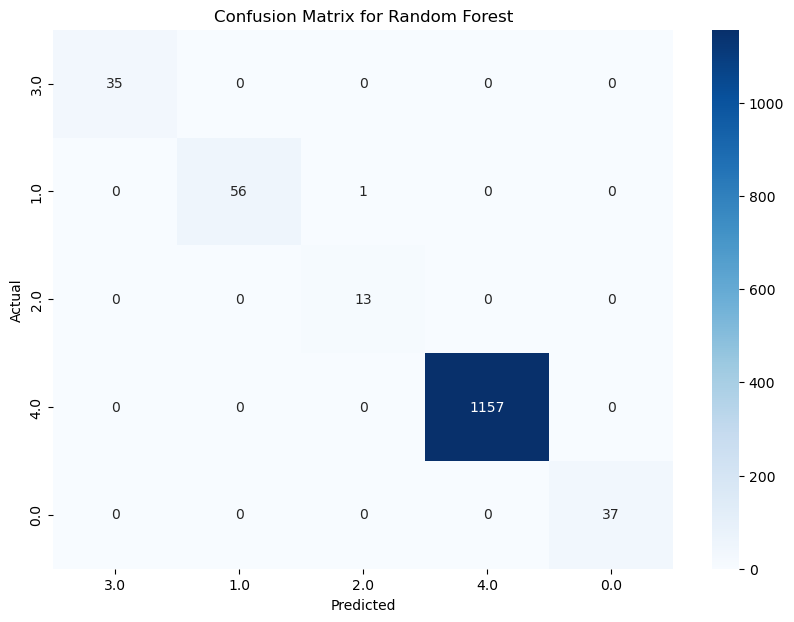

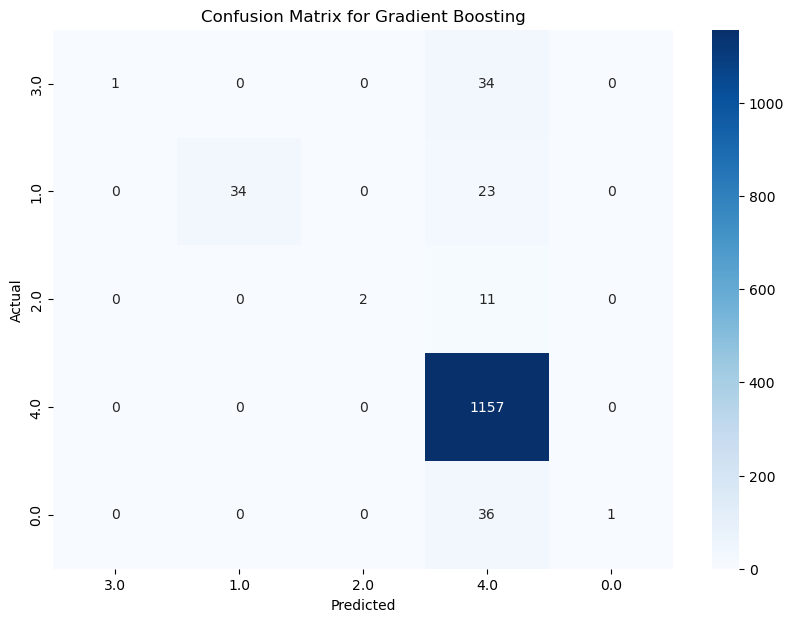

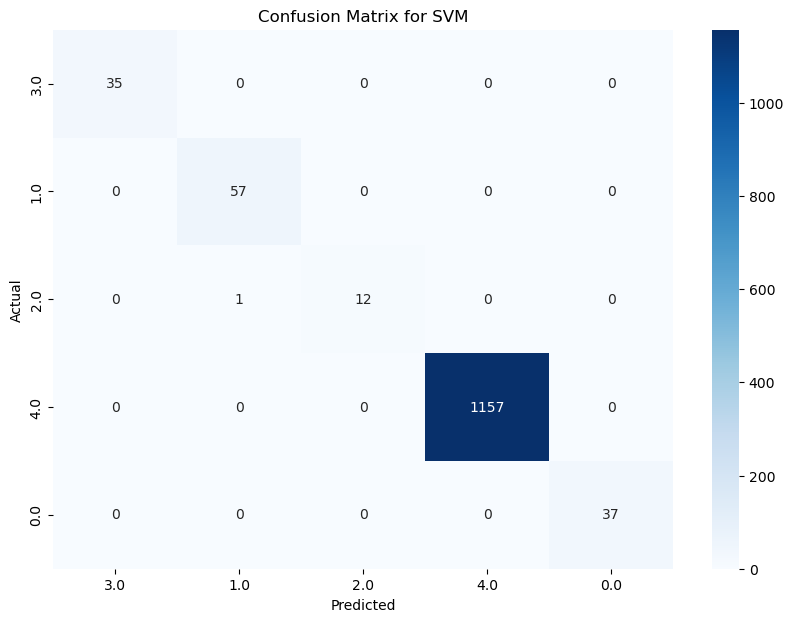

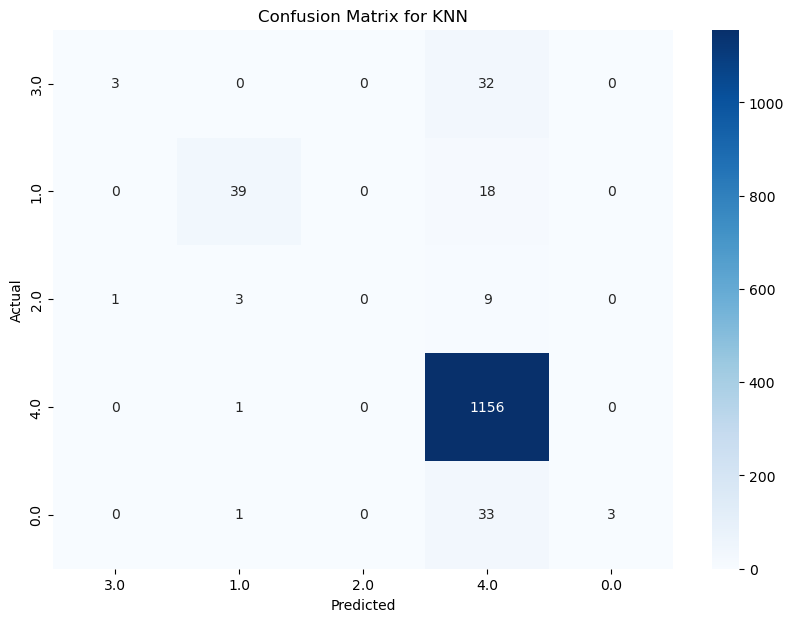

--- Voting Classifier ---
Accuracy: 0.9638183217859893
              precision    recall  f1-score   support

           0       1.00      0.51      0.68        35
           1       0.98      0.91      0.95        57
           2       1.00      0.46      0.63        13
           3       0.96      1.00      0.98      1157
           4       1.00      0.51      0.68        37

    accuracy                           0.96      1299
   macro avg       0.99      0.68      0.78      1299
weighted avg       0.97      0.96      0.96      1299



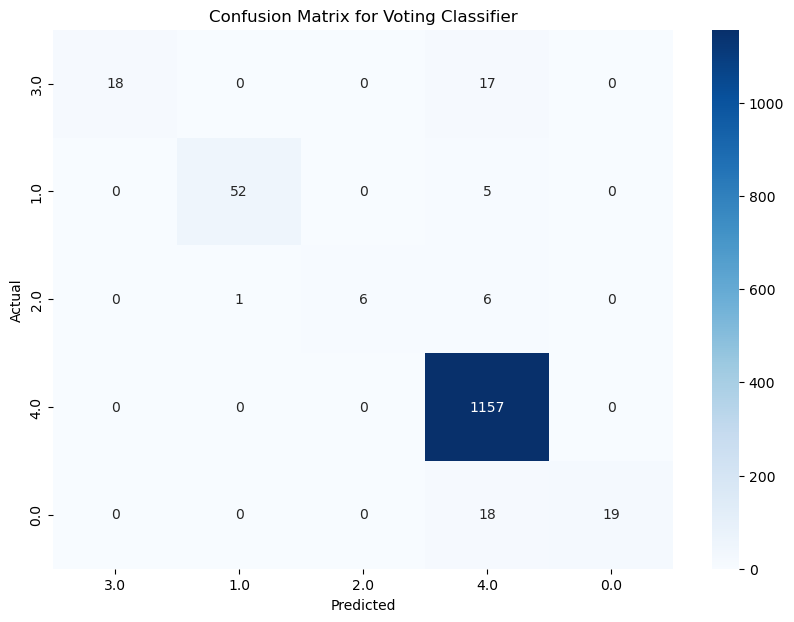

C:\Users\11948\AppData\Local\Temp\ipykernel_11596\4032063770.py:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='emotions', data=data, palette='Set2')


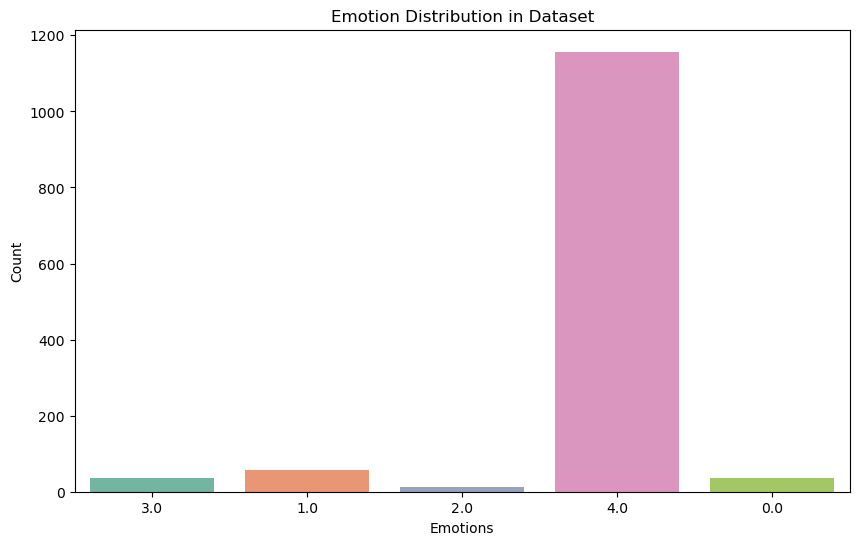

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load data
file_path = 'C:/Users/11948/Desktop/smile-annotations-final.csv'
data = pd.read_csv(file_path)

# 2. Map emotions to numerical values
emotion_mapping = {
    3.0: 3,  # happy
    1.0: 1,  # angry
    2.0: 2,  # disgust
    4.0: 4,  # sad
    0.0: 0   # surprise
}
data['emotions'] = data['emotions'].map(emotion_mapping)

# 3. Drop NaN values
data.dropna(subset=['text', 'emotions'], inplace=True)

# 4. Split data
X = data['text']
y = data['emotions']

# 5. Vectorize text data
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# 6. Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier()
}

# 7. Hyperparameter tuning for each model
best_models = {}
model_accuracies = {}
for model_name, model in models.items():
    if model_name == "Logistic Regression":
        param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
    elif model_name == "Decision Tree":
        param_grid = {'max_depth': [None, 10, 20, 30]}
    elif model_name == "Random Forest":
        param_grid = {'n_estimators': [50, 100, 200]}
    elif model_name == "Gradient Boosting":
        param_grid = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}
    elif model_name == "SVM":
        param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    elif model_name == "KNN":
        param_grid = {'n_neighbors': [3, 5, 7]}

    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_vectorized, y)
    best_models[model_name] = grid_search.best_estimator_
    model_accuracies[model_name] = grid_search.best_score_
    print(f"{model_name} Best Score: {grid_search.best_score_}")

# 8. Evaluate models and collect results
results = {}
for model_name, model in best_models.items():
    y_pred = model.predict(X_vectorized)
    accuracy = accuracy_score(y, y_pred)
    results[model_name] = accuracy
    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy)
    print(classification_report(y, y_pred))

# 9. Create a DataFrame for visualization
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])

# 10. Plot model accuracies
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.show()

# 11. Confusion matrices for each model
for model_name, model in best_models.items():
    y_pred = model.predict(X_vectorized)
    conf_matrix = confusion_matrix(y, y_pred)
    
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=list(emotion_mapping.keys()), yticklabels=list(emotion_mapping.keys()))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# 12. Voting Classifier (Ensemble Method)
voting_model = VotingClassifier(estimators=list(best_models.items()), voting='soft')
voting_model.fit(X_vectorized, y)
voting_pred = voting_model.predict(X_vectorized)

print("--- Voting Classifier ---")
print("Accuracy:", accuracy_score(y, voting_pred))
print(classification_report(y, voting_pred))

# Confusion matrix for Voting Classifier
conf_matrix_voting = confusion_matrix(y, voting_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_voting, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(emotion_mapping.keys()), yticklabels=list(emotion_mapping.keys()))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Voting Classifier')
plt.show()

# 13. Visualize data distribution (optional)
plt.figure(figsize=(10, 6))
sns.countplot(x='emotions', data=data, palette='Set2')
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Emotion Distribution in Dataset')
plt.xticks(ticks=range(len(emotion_mapping)), labels=list(emotion_mapping.keys()))
plt.show()

Logistic Regression Best Score: 0.9083843183843184
Decision Tree Best Score: 0.9060766260766261
Random Forest Best Score: 0.9091565191565192
Gradient Boosting Best Score: 0.9068488268488268
SVM Best Score: 0.9106979506979507
KNN Best Score: 0.9122334422334422
--- Logistic Regression ---
Accuracy: 0.9992301770592764
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.98      1.00      0.99        57
           2       1.00      0.92      0.96        13
           3       1.00      1.00      1.00      1157
           4       1.00      1.00      1.00        37

    accuracy                           1.00      1299
   macro avg       1.00      0.98      0.99      1299
weighted avg       1.00      1.00      1.00      1299

--- Decision Tree ---
Accuracy: 0.9407236335642802
              precision    recall  f1-score   support

           0       1.00      0.26      0.41        35
           1       1.00      0.79 

C:\Users\11948\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\11948\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\11948\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\11948\AppData\Local\Temp\ipyker

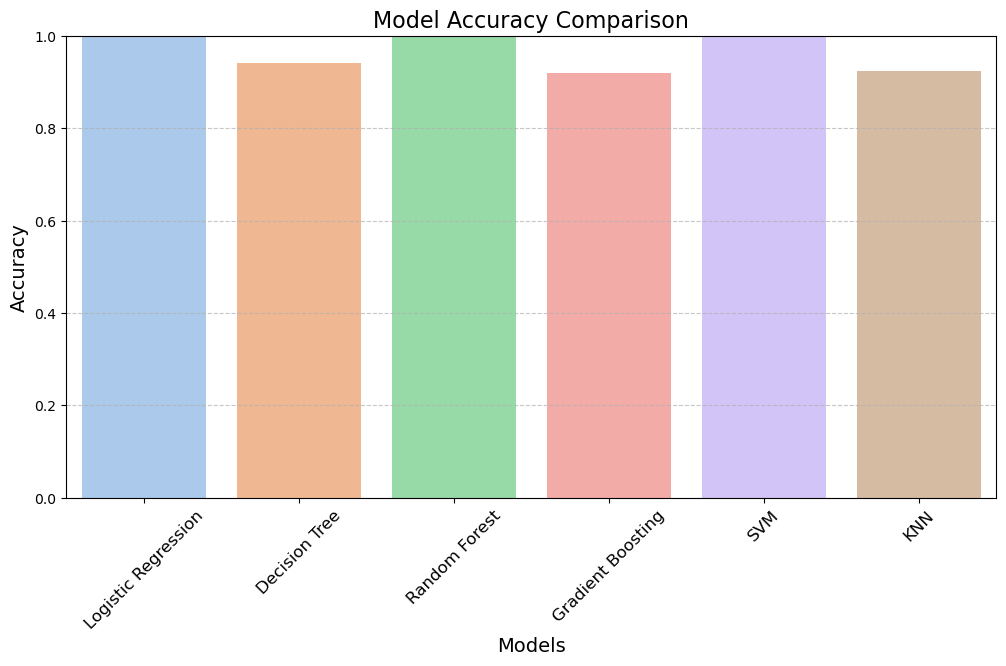

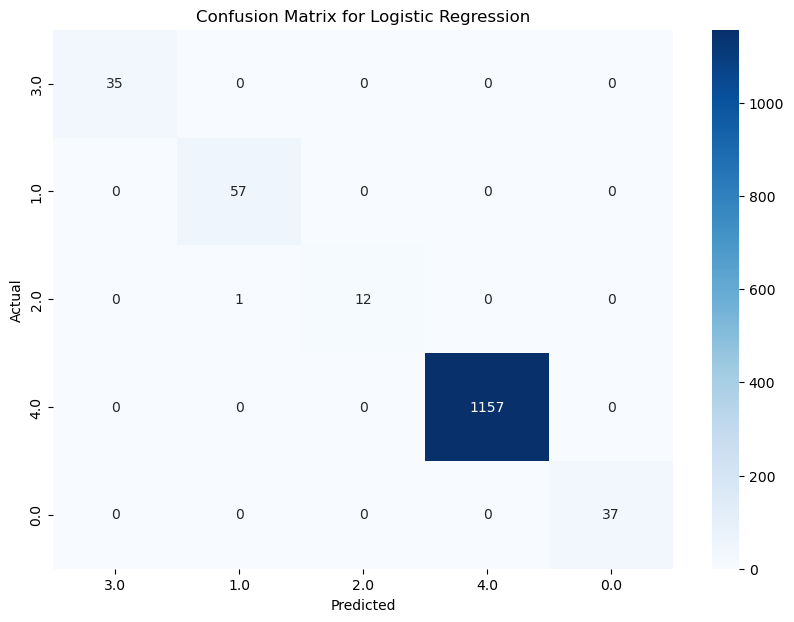

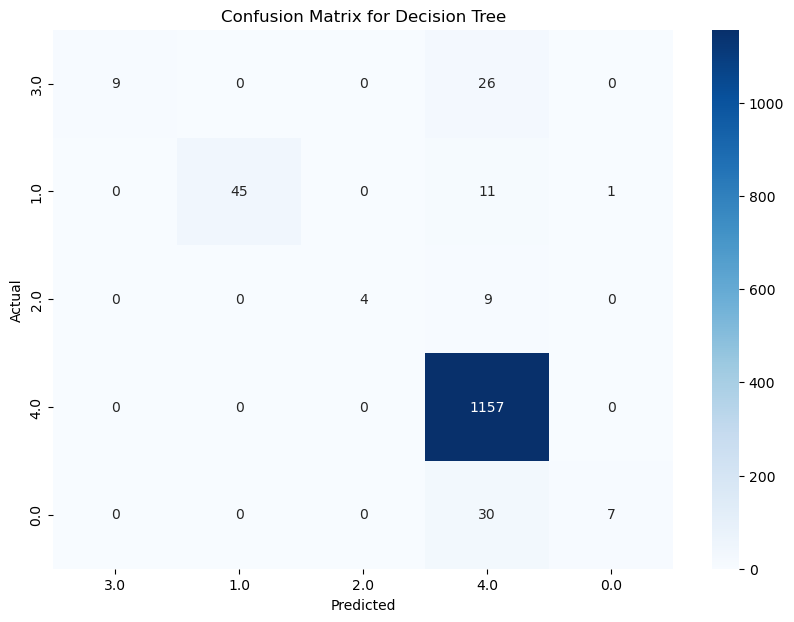

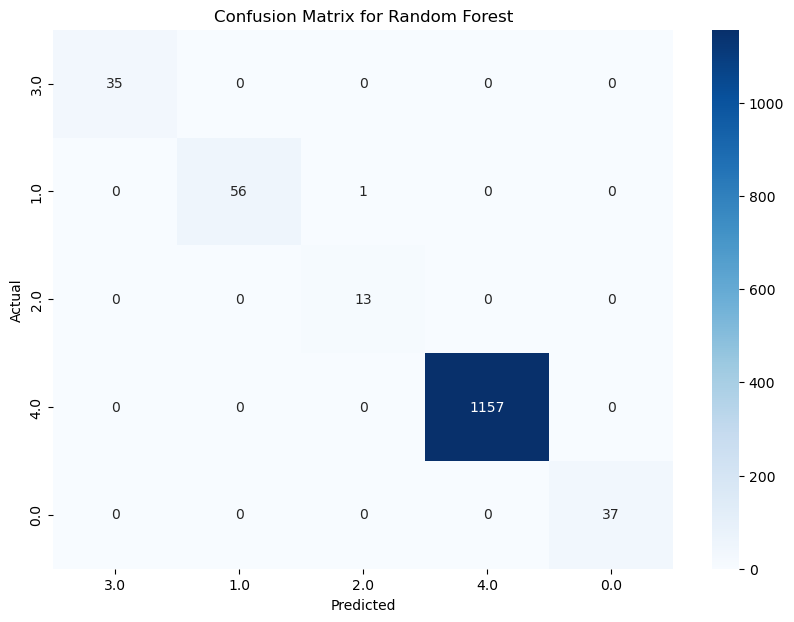

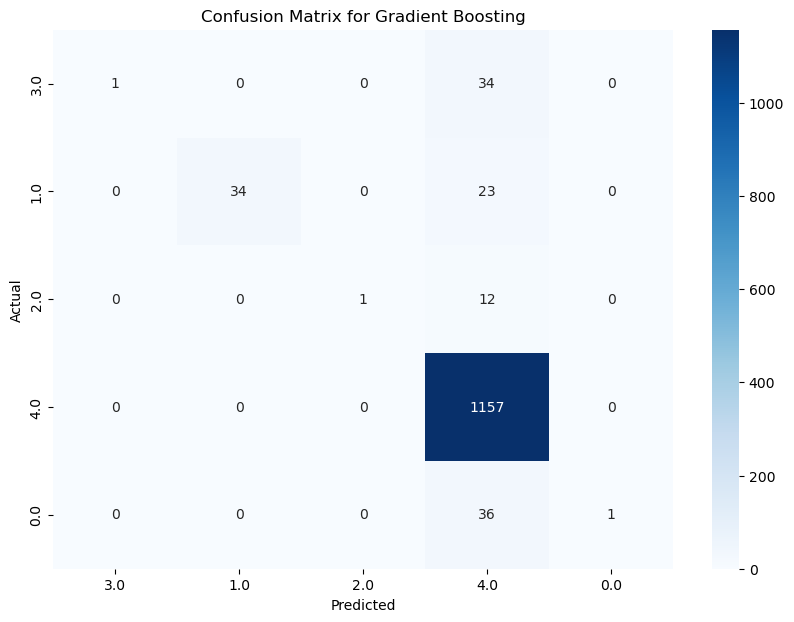

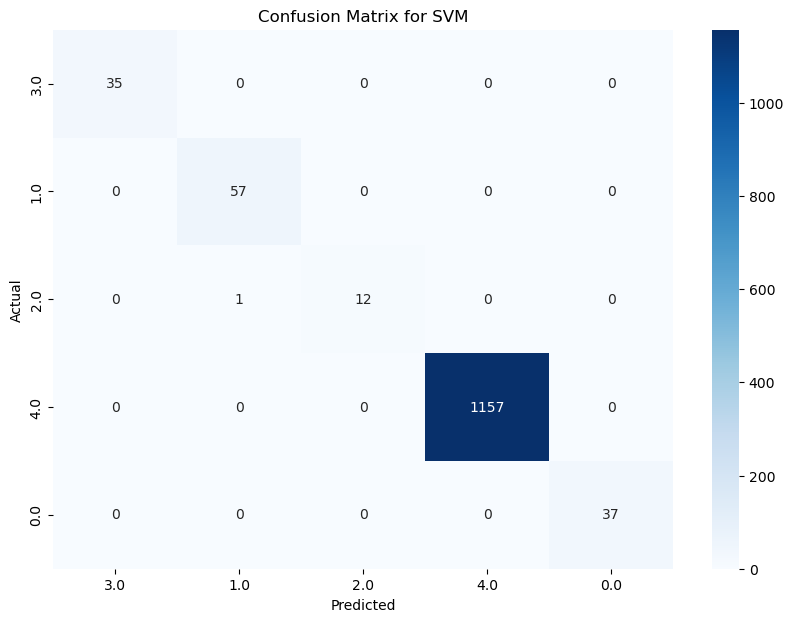

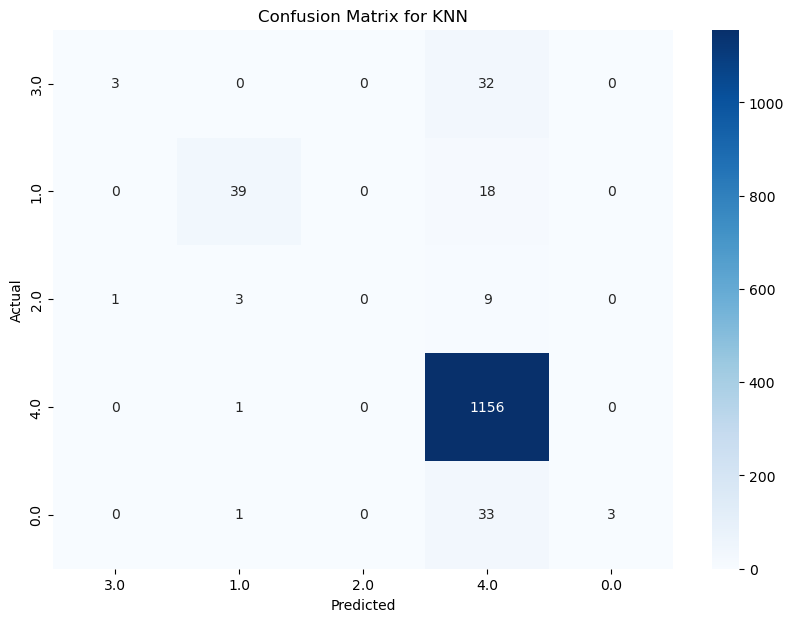

--- Voting Classifier ---
Accuracy: 0.9715165511932256
              precision    recall  f1-score   support

           0       1.00      0.60      0.75        35
           1       0.98      0.89      0.94        57
           2       1.00      0.46      0.63        13
           3       0.97      1.00      0.98      1157
           4       1.00      0.73      0.84        37

    accuracy                           0.97      1299
   macro avg       0.99      0.74      0.83      1299
weighted avg       0.97      0.97      0.97      1299



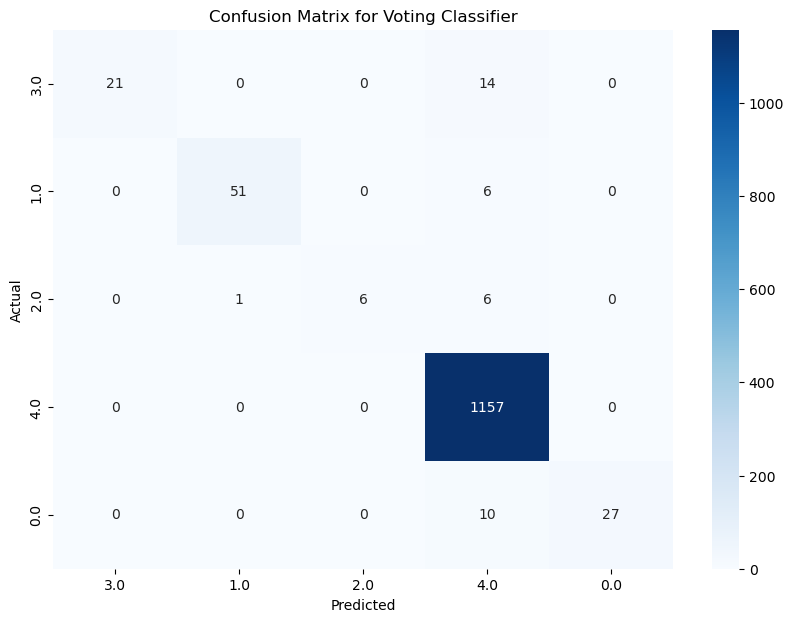

C:\Users\11948\AppData\Local\Temp\ipykernel_11596\1736097031.py:129: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='emotions', data=data, palette='Set2')


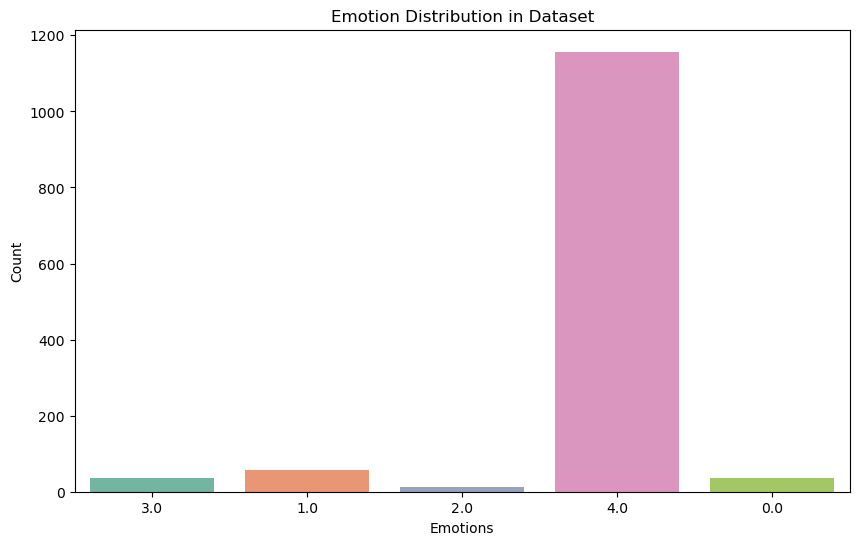

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load data
file_path = 'C:/Users/11948/Desktop/smile-annotations-final.csv'
data = pd.read_csv(file_path)

# 2. Map emotions to numerical values
emotion_mapping = {
    3.0: 3,  # happy
    1.0: 1,  # angry
    2.0: 2,  # disgust
    4.0: 4,  # sad
    0.0: 0   # surprise
}
data['emotions'] = data['emotions'].map(emotion_mapping)

# 3. Drop NaN values
data.dropna(subset=['text', 'emotions'], inplace=True)

# 4. Split data
X = data['text']
y = data['emotions']

# 5. Vectorize text data
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# 6. Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier()
}

# 7. Hyperparameter tuning for each model
best_models = {}
model_accuracies = {}
for model_name, model in models.items():
    if model_name == "Logistic Regression":
        param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
    elif model_name == "Decision Tree":
        param_grid = {'max_depth': [None, 10, 20, 30]}
    elif model_name == "Random Forest":
        param_grid = {'n_estimators': [50, 100, 200]}
    elif model_name == "Gradient Boosting":
        param_grid = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}
    elif model_name == "SVM":
        param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    elif model_name == "KNN":
        param_grid = {'n_neighbors': [3, 5, 7]}

    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_vectorized, y)
    best_models[model_name] = grid_search.best_estimator_
    model_accuracies[model_name] = grid_search.best_score_
    print(f"{model_name} Best Score: {grid_search.best_score_}")

# 8. Evaluate models and collect results
results = {}
for model_name, model in best_models.items():
    y_pred = model.predict(X_vectorized)
    accuracy = accuracy_score(y, y_pred)
    results[model_name] = accuracy
    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy)
    print(classification_report(y, y_pred))

# 9. Create a DataFrame for visualization
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])

# 10. Plot model accuracies with improved aesthetics
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='pastel')
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.ylim(0, 1)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Models', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 11. Confusion matrices for each model
for model_name, model in best_models.items():
    y_pred = model.predict(X_vectorized)
    conf_matrix = confusion_matrix(y, y_pred)
    
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=list(emotion_mapping.keys()), yticklabels=list(emotion_mapping.keys()))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# 12. Voting Classifier (Ensemble Method)
voting_model = VotingClassifier(estimators=list(best_models.items()), voting='soft')
voting_model.fit(X_vectorized, y)
voting_pred = voting_model.predict(X_vectorized)

print("--- Voting Classifier ---")
print("Accuracy:", accuracy_score(y, voting_pred))
print(classification_report(y, voting_pred))

# Confusion matrix for Voting Classifier
conf_matrix_voting = confusion_matrix(y, voting_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_voting, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(emotion_mapping.keys()), yticklabels=list(emotion_mapping.keys()))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Voting Classifier')
plt.show()

# 13. Visualize data distribution (optional)
plt.figure(figsize=(10, 6))
sns.countplot(x='emotions', data=data, palette='Set2')
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Emotion Distribution in Dataset')
plt.xticks(ticks=range(len(emotion_mapping)), labels=list(emotion_mapping.keys()))
plt.show()